Bài toán:\
• Đầu vào: N vector D chiều, tương ứng N cá thể với D thuộc tính.\
• Đầu ra: nhãn 0-1 (0: bad credit, 1: good credit).

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, ShuffleSplit, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

random_state = 42

In [4]:
data_path = 'german.data-numeric'
credit = np.genfromtxt(data_path)
print(credit)
X, y = credit[:,:-1], credit[:,-1]
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape)

[[ 1.  6.  4. ...  0.  1.  1.]
 [ 2. 48.  2. ...  0.  1.  2.]
 [ 4. 12.  4. ...  1.  0.  1.]
 ...
 [ 4. 12.  2. ...  0.  1.  1.]
 [ 1. 45.  2. ...  0.  1.  2.]
 [ 2. 45.  4. ...  0.  1.  1.]]
(1000, 24) (1000,)
(800, 24) (200, 24)


## Decision Tree and Random Forest models from Sklearn

In [5]:
DT = DecisionTreeClassifier(random_state = random_state)

In [6]:
RF = RandomForestClassifier(random_state = random_state)

In [17]:
print('Demo DT and RF prediction')
print('-------------------------')
DT.fit(X_train, y_train)
y_dt_pred = DT.predict(X_test)

print("- DT acc = {}".format(accuracy_score(y_test, y_dt_pred)))
print("- DT f1 = {}".format(f1_score(y_test, y_dt_pred)))
print("- DT roc auc = {}".format(roc_auc_score(y_test, y_dt_pred)))
print(confusion_matrix(y_test, y_dt_pred))
print(classification_report(y_test, y_rf_pred))

RF.fit(X_train, y_train)
y_rf_pred = RF.predict(X_test)

print("- RF acc = {}".format(accuracy_score(y_test, y_rf_pred)))
print("- RF f1 = {}".format(f1_score(y_test, y_rf_pred)))
print("- RF roc auc = {}".format(roc_auc_score(y_test, y_rf_pred)))
print(confusion_matrix(y_test, y_rf_pred))
print(classification_report(y_test, y_rf_pred))

Demo DT and RF prediction
-------------------------
- DT acc = 0.665
- DT f1 = 0.7632508833922261
- DT roc auc = 0.5948431301839163
[[108  33]
 [ 34  25]]
              precision    recall  f1-score   support

         1.0       0.81      0.95      0.88       141
         2.0       0.80      0.47      0.60        59

    accuracy                           0.81       200
   macro avg       0.81      0.71      0.74       200
weighted avg       0.81      0.81      0.79       200

- RF acc = 0.81
- RF f1 = 0.8758169934640523
- RF roc auc = 0.7124654405577594
[[134   7]
 [ 31  28]]
              precision    recall  f1-score   support

         1.0       0.81      0.95      0.88       141
         2.0       0.80      0.47      0.60        59

    accuracy                           0.81       200
   macro avg       0.81      0.71      0.74       200
weighted avg       0.81      0.81      0.79       200



## Hyperparameters

In [15]:
# Utility functions
def grid_search(algorithm, n_jobs, dict_param):
    if algorithm == 'decision-tree':
        model = DecisionTreeClassifier()
    if algorithm == 'random-forest':
        model = RandomForestClassifier()
    classifier = GridSearchCV(estimator=model, cv = 5, param_grid = dict_param,
                            n_jobs = n_jobs, scoring = 'f1')
    classifier.fit(X_train, y_train)
    print('Best model', end = '')
    print(classifier.best_estimator_)
    return classifier.best_estimator_

def evaluate(model): 
    print("Train Accuracy :", accuracy_score(y_train, model.predict(X_train)))
    print("Train f1 score :", f1_score(y_train, model.predict(X_train)))  
    print("Train roc auc :", roc_auc_score(y_train, model.predict(X_train)))  
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, model.predict(X_train)))
    print("-" * 50)
    print("Test Accuracy :", accuracy_score(y_test, model.predict(X_test)))
    print("Test f1 score :", f1_score(y_test, model.predict(X_test)))
    print("Test roc auc :", roc_auc_score(y_test, model.predict(X_test)))  
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, model.predict(X_test)))

def plot_learning_curve(estimator, title, label_curve, X, y, ylim = None, cv = None,
                        n_jobs = 1, train_sizes = np.linspace(.1, 1.0, 5), new_plot = False,
                        idx_color = 0):
    # Khởi tạo bức ảnh mới với thư viện plot lib 
    if new_plot:
        # plt.figure()
        plt.title(title)
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        plt.grid()
    # chú thích nếu có 
    if ylim is not None:
        plt.ylim(*ylim)
        
    # thực hiện training model, ghi nhận các giá trị trong quá trình training 
    # cv = số fold cross validate, số phần bộ dữ liệu được chia để thực hiện training testing.
    # train_sizes = mảng tỉ lệ, các tỉ lệ được hệ thống chọn làm điểm dừng để thực hiện 1 testing 
    # train_sizes = [0.3, 0.5] => hệ thống lấy 30 % dữ liệu để train và thực hiện test, tương tự 50 % ..
    # scoring = hàm mục tiêu để đánh giá chất lượng mô hình và vẽ lên đồ thị 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes, scoring = "f1")
    # Lấy trung bình cộng các giá trị output của các fold 
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    
    # thực hiện vẽ các giá trị số lên đồ thị với màu vừa được random 
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = 'r')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha = 0.1, color = 'g')
    plt.plot(train_sizes, test_scores_mean, 'o-', color = 'r',
             label = label_curve['test'])
    plt.plot(train_sizes, train_scores_mean, 'o-', color = 'g',
             label = label_curve['train'])

    plt.legend(loc = "best")
    return plt

1. Decision Tree

Text(0.5, 1.0, 'DT validation curve for max_depth')

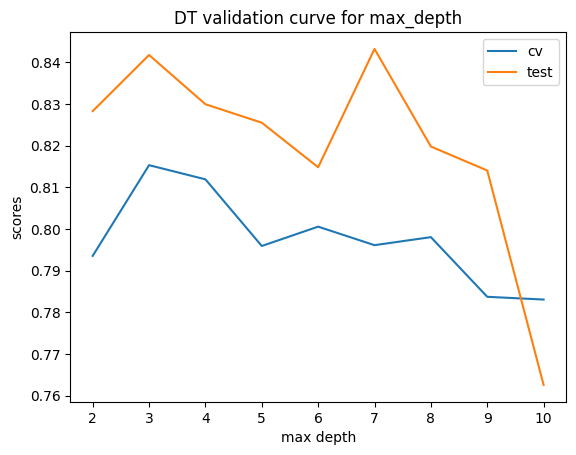

In [16]:
# Trước hết, hãy thử khảo sát DT với tham số max_depth
cv_accuracies_by_depth, test_accuracies_by_depth = [], []
max_depth_values = np.arange(2, 11)

for curr_max_depth in max_depth_values:
  tree = DecisionTreeClassifier(random_state = random_state, max_depth = curr_max_depth)
  
  # cross-validation
  val_scores = cross_val_score(estimator = tree, X = X_train, y = y_train, cv = 5, scoring = 'f1')
  cv_accuracies_by_depth.append(val_scores.mean())

  # test
  tree.fit(X_train, y_train)
  curr_pred = tree.predict(X_test)
  test_accuracies_by_depth.append(f1_score(curr_pred, y_test))

# Plot 
plt.plot(max_depth_values, cv_accuracies_by_depth, label = 'cv')
plt.plot(max_depth_values, test_accuracies_by_depth, label = 'test')
plt.legend() 
plt.xlabel('max depth')
plt.ylabel('scores')
plt.title('DT validation curve for max_depth')

In [19]:
# Thử sử dụng GridSearchCV để khảo sát
dict_param = {
    'max_depth': [2, 3, 5, 7, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
best_tree = grid_search('decision-tree', n_jobs = -1, dict_param = dict_param)

Best modelDecisionTreeClassifier(max_depth=5, min_samples_leaf=20)


Train Accuracy : 0.77125
Train f1 score : 0.8473728106755629
Train roc auc : 0.680523905314024
Train Confusion Matrix:
[[508  51]
 [132 109]]
--------------------------------------------------
Test Accuracy : 0.78
Test f1 score : 0.8533333333333334
Test roc auc : 0.6911888448130785
Test Confusion Matrix:
[[128  13]
 [ 31  28]]


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/pyplot.py'>

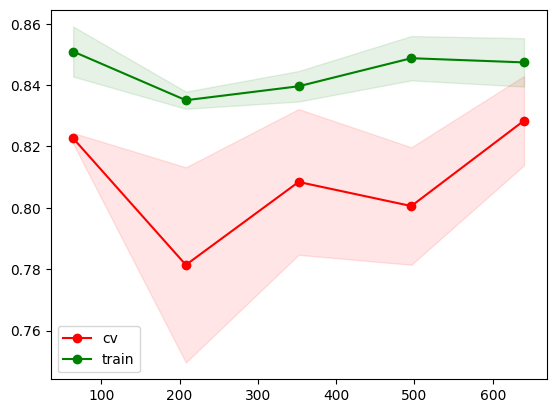

In [ ]:
best_tree.fit(X_train, y_train)
evaluate(best_tree)
title = 'Learning curve with best tree'
label_curve = {'train': 'train', 'test':'cv'}
plot_learning_curve(best_tree, title, label_curve, X_train, y_train, cv = 5)

Top 10 feature importances
Feature  0 - 0.4044500592271595
Feature  1 - 0.17066428015343652
Feature  2 - 0.1426135291028632
Feature  3 - 0.0712034418581677
Feature  4 - 0.05428847945598894
Feature  5 - 0.05400258515142502
Feature  6 - 0.04007488290946428
Feature  7 - 0.038137818296121076
Feature  8 - 0.015091674891623287
Feature  9 - 0.009473248953750433


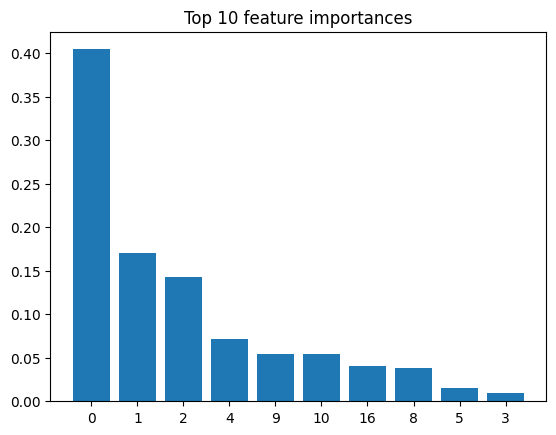

In [21]:
# Nhận xét về độ quan trọng của từng feature
importances = best_tree.feature_importances_
indices = np.argsort(importances)[::-1]
print('Top 10 feature importances')
for i in range(10):
    print('Feature ', i, '-', importances[indices[i]])

indices = indices[:10]
plt.figure()
plt.title('Top 10 feature importances')
plt.bar(range(10), importances[indices])
plt.xticks(range(10), indices)
plt.show()